In [1]:
#Importing the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\NischithaMR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\api\preprocessing\image\__init__.py)

In [3]:
#Data Preprocessing
#Preprocessing the Training set

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                     
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../input/lung-cancer-dataset1/dataset1/dataset1/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 343 images belonging to 2 classes.


In [4]:
#Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../input/lung-cancer-dataset1/dataset1/dataset1/test_set',
                                            target_size = (64, 64),
                                            
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 152 images belonging to 2 classes.


In [6]:
#Building the CNN
#Initialising the CNN
cnn = tf.keras.models.Sequential()

In [7]:
#Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64,3]))

In [8]:
#Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64,3]))

In [9]:
#Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
#Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

In [11]:
#Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
#Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [13]:
#Training the CNN
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
from PIL import Image

In [15]:
#Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 30, verbose=1)

cnn.save('30epoch.hdf5')

2022-10-23 11:48:03.469933: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
11/11 [==============================] - 8s 700ms/step - loss: 0.6970 - accuracy: 0.5889 - val_loss: 0.5497 - val_accuracy: 0.8487
Epoch 2/30
11/11 [==============================] - 4s 373ms/step - loss: 0.5577 - accuracy: 0.7551 - val_loss: 0.3741 - val_accuracy: 0.8553
Epoch 3/30
11/11 [==============================] - 4s 368ms/step - loss: 0.4818 - accuracy: 0.7843 - val_loss: 0.2950 - val_accuracy: 0.9408
Epoch 4/30
11/11 [==============================] - 4s 358ms/step - loss: 0.3999 - accuracy: 0.8309 - val_loss: 0.2305 - val_accuracy: 0.9342
Epoch 5/30
11/11 [==============================] - 4s 370ms/step - loss: 0.2884 - accuracy: 0.8950 - val_loss: 0.1600 - val_accuracy: 0.9539
Epoch 6/30
11/11 [==============================] - 4s 359ms/step - loss: 0.2431 - accuracy: 0.9155 - val_loss: 0.0486 - val_accuracy: 0.9868
Epoch 7/30
11/11 [==============================] - 4s 356ms/step - loss: 0.1423 - accuracy: 0.9446 - val_loss: 0.0520 - val_accuracy: 0.9934
Epoch 

In [16]:
print(cnn.evaluate(test_set))

5/5 [==============================] - 1s 218ms/step - loss: 0.2341 - accuracy: 0.9539
[0.23407085239887238, 0.9539473652839661]


In [17]:
print(cnn.evaluate(training_set))

11/11 [==============================] - 3s 273ms/step - loss: 0.0211 - accuracy: 0.9942
[0.021118659526109695, 0.9941691160202026]


In [20]:
from keras.models import load_model
my_model10000 = load_model('../input/lung-cancer-dataset1/saved models1/saved models/10000epoch.hdf5', 
                      compile=False)

cancer


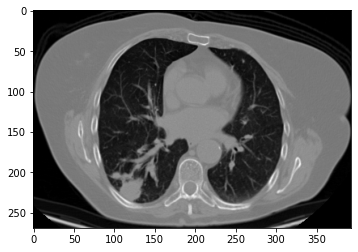

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as imre
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('../input/lung-cancer-dataset1/dataset1/dataset1/test_set/cancer/C100.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = my_model10000.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'normal'
else:
  prediction = 'cancer'
print(prediction)
test_image = imre.imread('../input/lung-cancer-dataset1/dataset1/dataset1/test_set/cancer/C100.png')
plt.imshow(test_image)
plt.show()

normal


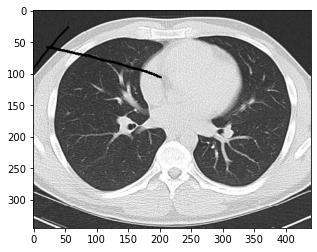

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as imre
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('../input/lung-cancer-dataset1/dataset1/dataset1/test_set/normal/N16.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = my_model10000.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'normal'
else:
  prediction = 'cancer'
print(prediction)
test_image = imre.imread('../input/lung-cancer-dataset1/dataset1/dataset1/test_set/normal/N16.png')
plt.imshow(test_image)
plt.show()